In [14]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

from mediapipe.python.solutions.drawing_utils import draw_landmarks
from mediapipe.python.solutions import drawing_styles



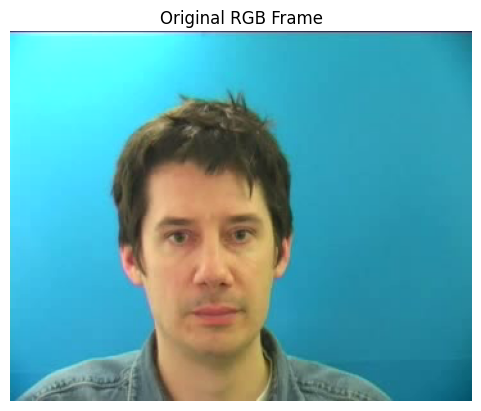

In [10]:
video_path = r"C:\Projects\Lip Reading\GRID\s1\bbaf2n.mpg"

capture = cv2.VideoCapture(video_path)
returned, frame = capture.read()
capture.release()

if not returned:
    raise ValueError("Failed to load from video")

rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_frame)
plt.title("Original RGB Frame")
plt.axis(False)
plt.show()

In [13]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode = True, max_num_faces = 1)
results = face_mesh.process(rgb_frame)

if results.multi_face_landmarks:
    print("Landmarks detected!")
else:
    print("No face landmarks found.")


Landmarks detected!


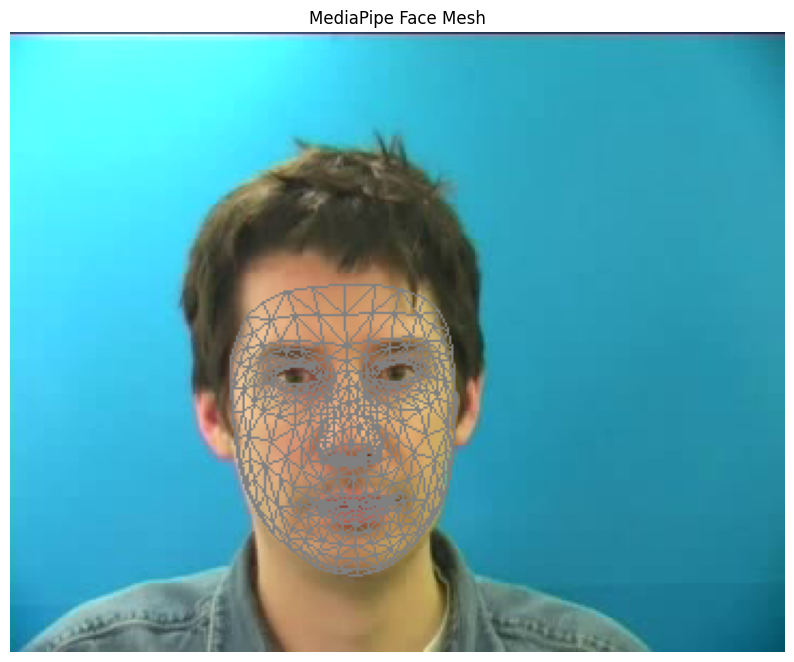

In [15]:

frame_copy = rgb_frame.copy()
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        draw_landmarks(
            image=frame_copy,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=drawing_styles.get_default_face_mesh_tesselation_style()
        )

plt.figure(figsize=(10, 10))
plt.imshow(frame_copy)
plt.title("MediaPipe Face Mesh")
plt.axis("off")
plt.show()


In [20]:
# Outer lips (full loop)
outer_lips = [61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78]

# Inner lips (inside mouth opening)
inner_lips = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78]

# Combine and remove duplicates
mouth_indices = list(set(outer_lips + inner_lips))
mouth_indices.sort()


landmarks = results.multi_face_landmarks[0]
h, w, _ = rgb_frame.shape

mouth_coords = []
for i in mouth_indices:
    lm = landmarks.landmark[i]
    x, y = int(lm.x * w), int(lm.y * h)
    mouth_coords.append((x, y))



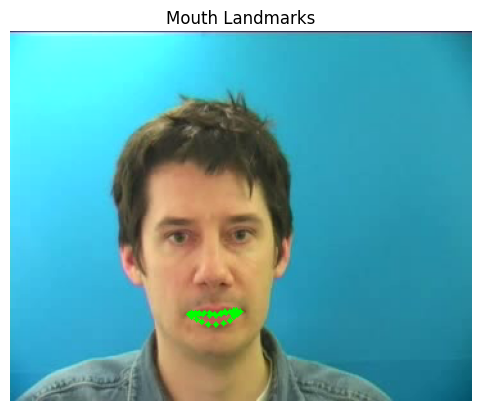

In [21]:
mouth_frame = rgb_frame.copy()
for x, y in mouth_coords:
    cv2.circle(mouth_frame, (x, y), 2, (0, 255, 0), -1)

plt.imshow(mouth_frame)
plt.title("Mouth Landmarks")
plt.axis("off")
plt.show()
